In [76]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from  sklearn.linear_model import LinearRegression ,Ridge
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("Ecommerce Customers")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [15]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
df.drop(['Email',"Address","Avatar"],axis=1,inplace=True)

In [18]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [26]:
df.rename(columns={'Yearly Amount Spent':"YAS"},inplace=True)

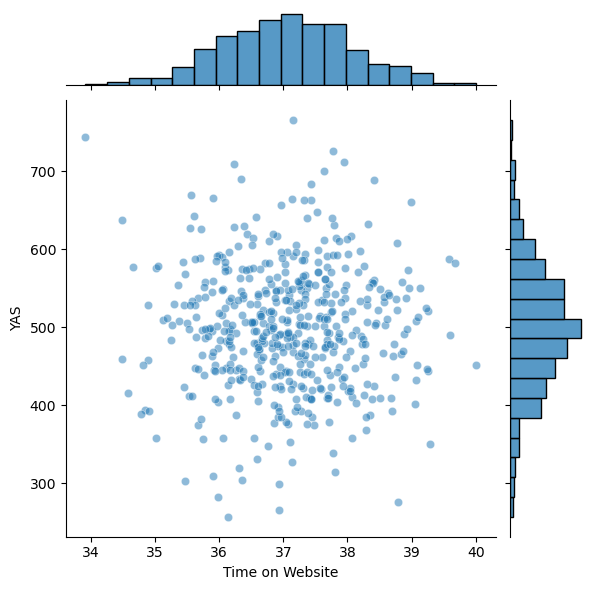

In [30]:
sns.jointplot(x='Time on Website',y='YAS',data=df,alpha=0.5)

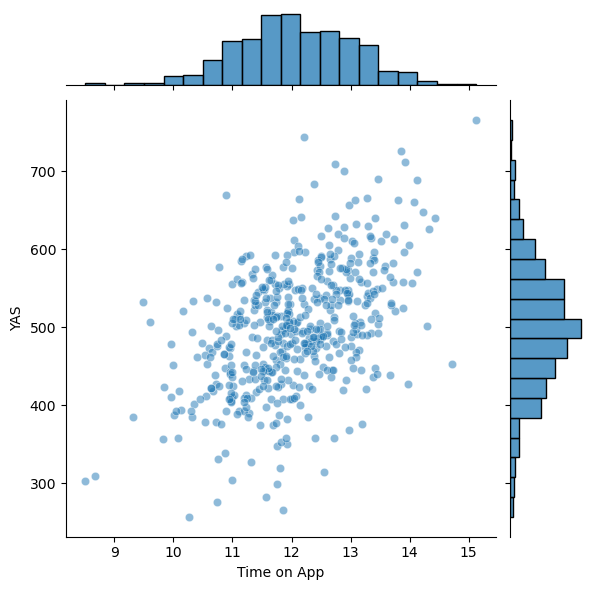

In [32]:
sns.jointplot(x='Time on App',y='YAS',data=df,alpha=0.5)

<Axes: >

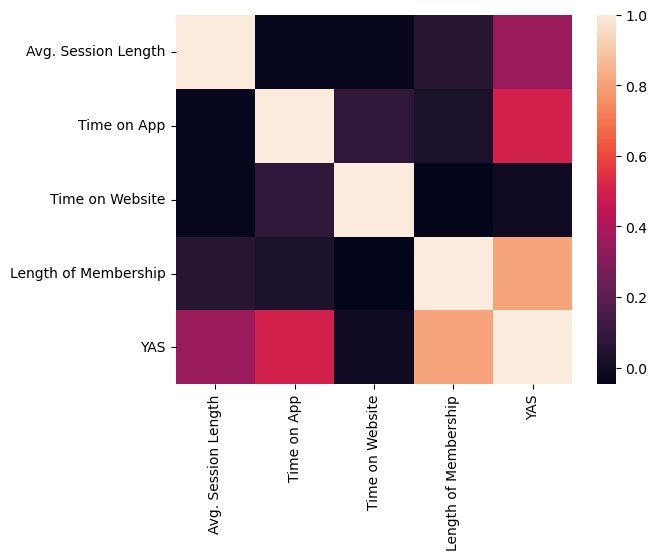

In [47]:
sns.heatmap(df.corr())

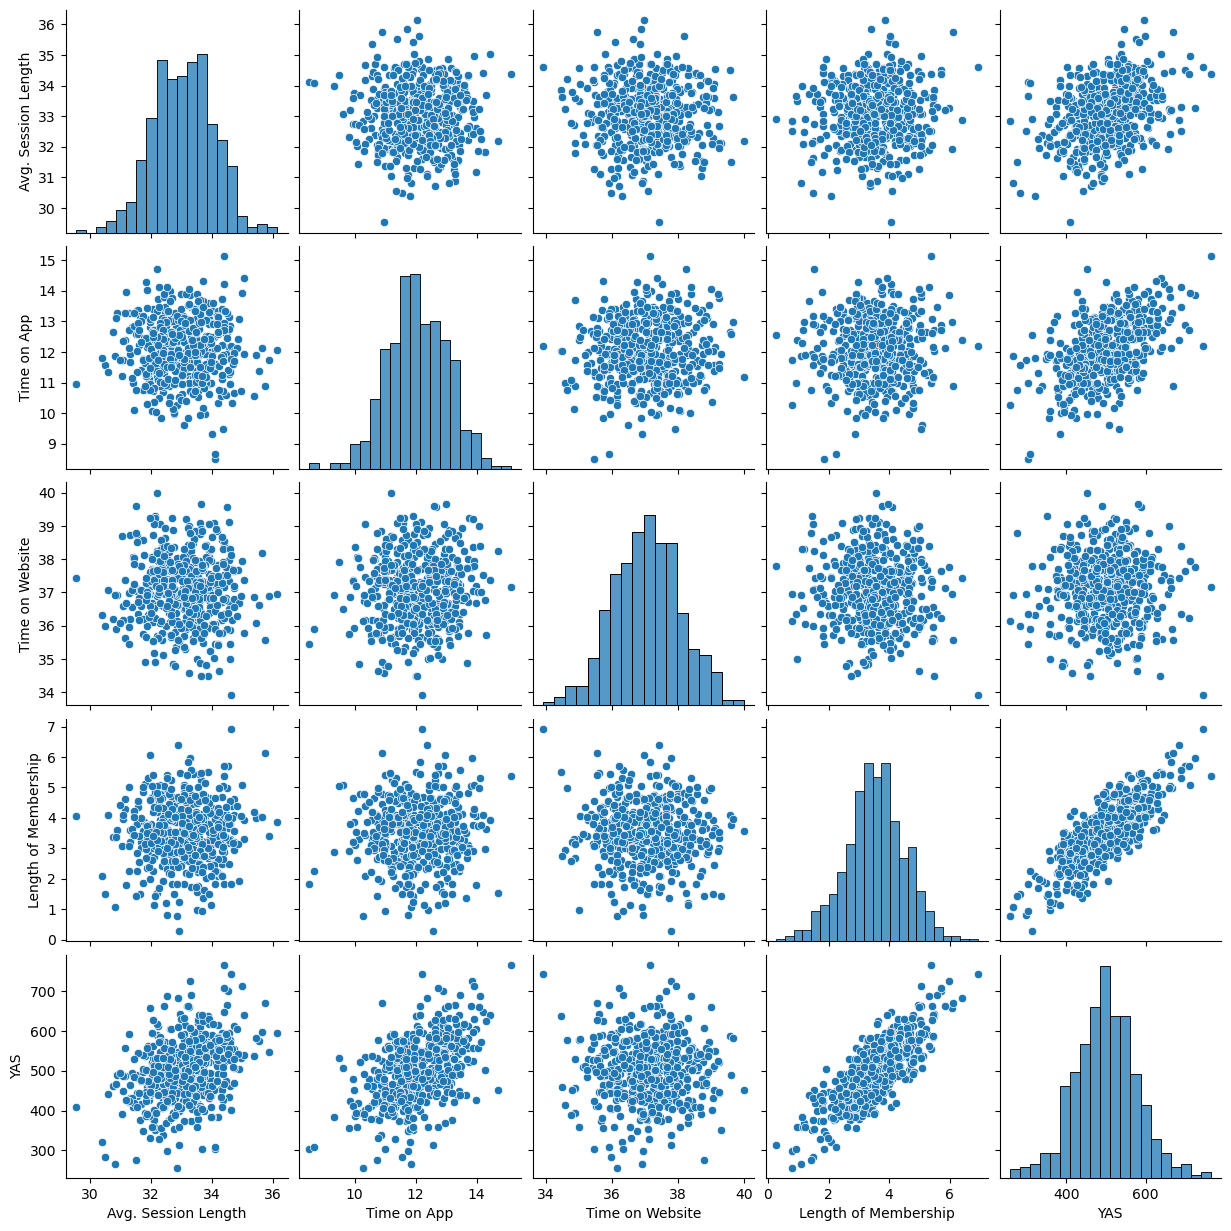

In [48]:
sns.pairplot(df)

In [46]:
names=['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']
for item in names :
    
    pearsonr,p_value = stats.pearsonr(df[item],df["YAS"])
    print(item)
    print("the pearson coeff is ",pearsonr,"the p value is ",p_value)

Avg. Session Length
the pearson coeff is  0.35508829470764314 the p value is  2.6450940333354863e-16
Time on App
the pearson coeff is  0.4993277700534505 the p value is  6.905842369973249e-33
Time on Website
the pearson coeff is  -0.0026408446721589186 the p value is  0.9530290603518256
Length of Membership
the pearson coeff is  0.809083568247581 the p value is  4.8066157825846074e-117


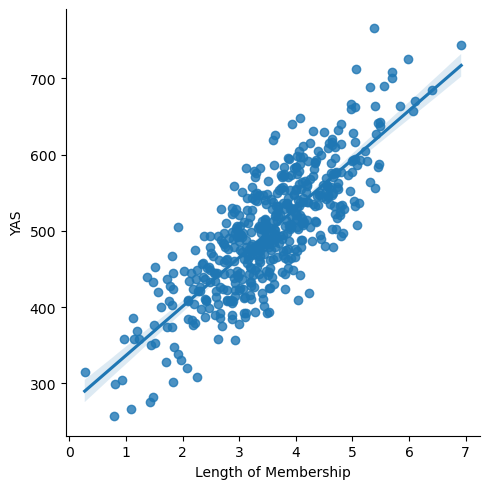

In [50]:
sns.lmplot(x='Length of Membership',y='YAS',data=df)

# data spliting 

In [60]:
X=df[['Avg. Session Length', 'Time on App',
       'Length of Membership']]
Y=df["YAS"]

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [66]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
lm.score(X_test,Y_test)
Yhat=lm.predict(X_test)

In [64]:
score = cross_val_score(lm,X,Y)
score.mean()

0.9836948430384123

C:\Users\ayman\AppData\Local\Temp\ipykernel_1916\904304089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Yhat,hist=False,color="b",label="prediction")
C:\Users\ayman\AppData\Local\Temp\ipykernel_1916\904304089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test

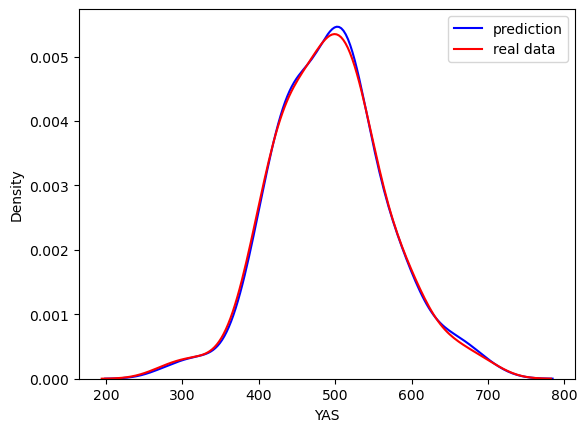

In [69]:
ax1=sns.distplot(Yhat,hist=False,color="b",label="prediction")
sns.distplot(Y_test,hist=False,color="r",label="real data",ax=ax1)
plt.legend()



In [110]:
 residual = Y_test - Yhat

In [111]:
Prediction = pd.DataFrame({"Prediction":Yhat,"Real data":Y_test,"Residual":residual})

In [112]:
Prediction

,Prediction,Real data,Residual
361,402.673245,401.033135,-1.640110
73,542.577913,534.777188,-7.800725
374,426.504130,418.602742,-7.901388
155,501.962518,503.978379,2.015861
104,409.585951,410.069611,0.483660
...,...,...,...
266,543.221179,554.003093,10.781915
23,504.396425,519.340989,14.944564
222,518.431504,502.409785,-16.021719
261,520.216635,514.009818,-6.206817


C:\Users\ayman\AppData\Local\Temp\ipykernel_1916\1150177231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Prediction["Residual"])


<Axes: xlabel='Residual', ylabel='Density'>

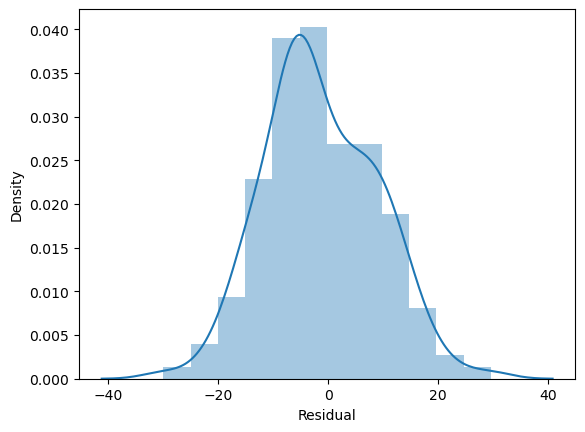

In [117]:
sns.distplot(Prediction["Residual"])

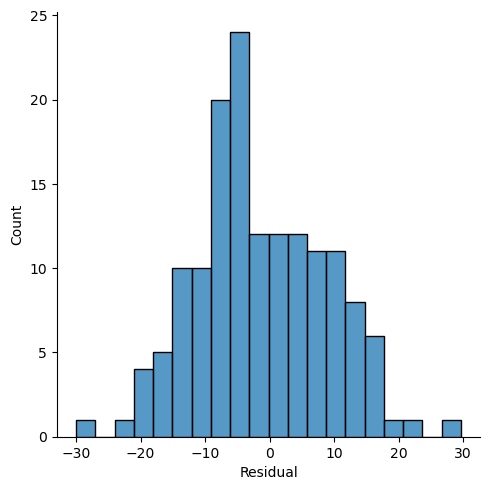

In [119]:
sns.displot(Prediction["Residual"],bins=20)